In [203]:
# basic
import numpy as np
import pandas as pd 
import datetime as dt 
from tqdm import tqdm

# Main Datasource
from pandas_datareader import data as pdr 

# Plot Figure
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
plt.style.use('ggplot')

In [204]:
wiki = 'https://en.wikipedia.org/wiki/'
tickersDOW = pd.read_html(wiki+'Dow_Jones_Industrial_Average')[1].Symbol.to_list()
print(tickersDOW)

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']


In [205]:
class Company_Data():
    """
    ticker     --> list (str)
    start ,end --> datetime 
    peirods    --> string
    """
    def __init__(self,tickers,start,end,periods):

        self.start   = start 
        self.end     = end 
        self.tickers = tickers
        self.periods = periods
    
    def get_data(self,ticker):

        self.df = pdr.get_data_yahoo(ticker,self.start,self.end).reset_index()
   
        return self.df 
    
    def Address_date(self,date):
        date = str(date)[:10]
        return date
    
    def get_price_data(self):

        for i , ticker in enumerate(self.tickers) : 
            
            if i == 0 :
                Price_DF = self.get_data(ticker)
                Price_DF = Price_DF[['Date','Close']]
                Price_DF.columns = ['Date',str(ticker)]
            else:
                Merge_DF = self.get_data(ticker)[['Date','Close']]
                Merge_DF.columns = ['Date',str(ticker)]
                Price_DF = Price_DF.merge(Merge_DF,how='outer')
        
        Price_DF = Price_DF.fillna(value=0)
        Price_DF['Date'] = Price_DF.apply(lambda x : self.Address_date(x['Date']),axis=1)
        Price_DF.index   = Price_DF['Date']
        Price_DF         = Price_DF.drop(['Date'],axis=1)
        Price_DF         = Price_DF.fillna('backfill')

        return Price_DF


# ------------ Company_DF parameters ------------ 
start        = dt.datetime(2018,1,1)
end          = dt.datetime(2021,9,30)
tickers      = tickersDOW 

# ------------ ------------ ------------ ------------ 
Market_Price  = Company_Data(tickers=['^DJI'],start=start,end=end,periods="Daily").get_price_data()
Company_Price = Company_Data(tickers=tickers,start=start,end=end,periods="Daily")
Stock_DF      = Company_Price.get_price_data()
Stock_DF 


,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,235.639999,98.940002,177.000000,43.064999,296.839996,157.039993,127.580002,38.860001,45.540001,0.000000,...,63.490002,90.650002,104.410004,131.979996,221.160004,53.529999,114.510002,74.949997,98.589996,111.800003
2018-01-03,235.630005,99.550003,180.339996,43.057499,297.799988,157.279999,128.509995,39.169998,45.439999,0.000000,...,63.480000,90.540001,105.290001,132.399994,223.479996,52.430000,115.650002,75.510002,99.449997,112.279999
2018-01-04,238.710007,100.849998,179.580002,43.257500,296.670013,159.440002,128.110001,38.990002,46.080002,0.000000,...,63.439999,91.180000,106.680000,132.399994,224.449997,52.599998,116.080002,71.599998,99.540001,112.230003
2018-01-05,240.570007,101.080002,180.649994,43.750000,308.839996,161.960007,127.900002,39.529999,46.070000,0.000000,...,63.980000,91.239998,108.099998,132.160004,228.729996,52.480000,118.860001,72.919998,100.129997,111.620003
2018-01-08,239.789993,100.150002,180.600006,43.587502,310.149994,166.029999,128.529999,39.939999,46.000000,0.000000,...,64.550003,91.720001,108.860001,131.449997,224.759995,52.389999,119.339996,73.849998,101.610001,110.019997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,181.039993,175.720001,213.610001,146.919998,221.389999,196.820007,100.599998,56.730000,53.889999,56.810001,...,149.589996,143.550003,285.630005,156.460007,407.079987,54.369999,231.589996,48.310001,143.169998,176.000000
2021-09-27,181.789993,176.770004,213.110001,145.369995,224.160004,200.000000,102.970001,56.220001,53.610001,59.689999,...,148.039993,141.660004,279.679993,156.289993,405.269989,54.470001,229.600006,48.799999,142.250000,178.259995
2021-09-28,180.050003,173.139999,212.270004,141.910004,218.410004,200.550003,103.360001,55.520000,52.639999,59.459999,...,145.300003,140.589996,272.279999,153.490005,398.619995,54.160000,225.559998,48.090000,140.500000,174.520004


# Momentum Factor 

In [206]:
def Momentum(prices,Long_Term_Day,Short_Term_Day):

    # For 分母
    if prices[-Long_Term_Day] == 0:
        Change_in_Over_the_year = 0 

    else : 
        Change_in_Over_the_year  = (prices[-Short_Term_Day] - prices[-Long_Term_Day]) / prices[-Long_Term_Day]

    # For 分子 
    if prices[-Short_Term_Day] == 0 :
        Change_in_Over_the_month  = 0 
    else : 
        Change_in_Over_the_month = (prices[-1] - prices[-Short_Term_Day]) / prices[-Short_Term_Day] 
    
    # handle returns inf value problem
    returns  = pd.Series(prices).pct_change()
    returns.replace([np.inf, -np.inf], np.nan, inplace=True)
    returns = returns.dropna()

    # price change in over time / standarized 
    Momentum_Factor  = ( Change_in_Over_the_year - Change_in_Over_the_month ) / np.nanstd(returns, axis=0)

    return Momentum_Factor

# Construct Rolling Factor DF

In [207]:
Stock_DF_Rolling = Stock_DF.rolling(window=252)
a = 0

Factor_DF    = pd.DataFrame(columns=Stock_DF.columns)
Factor_Index = []

for rolling_df in tqdm(Stock_DF_Rolling) :

    if rolling_df.shape[0] >= 252 : 
        
        date              = str(rolling_df.index[0])[:10]
        Date_Factor_Score = [Momentum(rolling_df[ticker].values,Long_Term_Day=252,Short_Term_Day=21) for ticker in rolling_df.columns ]
        Factor_DF         = Factor_DF.append(pd.Series(Date_Factor_Score,index=rolling_df.columns),ignore_index=True)
        Factor_Index.append(date)


Factor_DF.index = Factor_Index
Factor_DF       = Factor_DF.dropna(axis=1) # drop if price out of range 
Factor_DF 

0it [00:00, ?it/s]/Users/chen-lichiang/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
253it [00:00, 2098.59it/s]<ipython-input-206-4b3fb6bbaadf>:22: RuntimeWarning: invalid value encountered in double_scalars
  Momentum_Factor  = ( Change_in_Over_the_year - Change_in_Over_the_month ) / np.nanstd(returns, axis=0)
944it [00:19, 47.41it/s]


,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,GS,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
2018-01-02,-2.401954,18.617866,17.188893,8.448199,11.850840,-3.291421,0.108151,20.100419,18.348645,-9.612747,...,10.705767,6.209323,19.518432,6.867338,27.871599,15.362312,18.836504,18.960622,2.291758,6.869683
2018-01-03,0.376934,19.498020,13.085931,15.909051,17.304997,0.433758,2.582281,23.805392,16.177486,-7.865896,...,15.942547,4.803983,21.559614,7.571388,30.916831,11.155558,23.046564,20.290926,3.485790,8.553111
2018-01-04,-6.446201,10.349383,7.543454,9.440639,9.876463,-8.585033,-1.971247,18.005721,12.113935,-14.165608,...,11.315125,2.586765,14.404868,1.554379,25.902249,10.492017,14.147890,18.603556,-0.843608,2.609635
2018-01-05,-6.459317,10.594093,7.093259,7.873914,4.296093,-9.859250,-4.072283,19.380919,12.541508,-14.380841,...,9.613248,3.266427,14.298140,0.434580,23.420081,10.173176,13.664425,17.294793,-3.381899,4.317858
2018-01-08,-9.119131,9.076147,0.807377,3.712278,-0.565749,-14.667010,-4.529969,13.156655,10.330179,-16.038574,...,4.847252,0.631677,8.067214,-1.061904,20.077246,6.876636,9.300681,12.949846,-6.921591,1.723612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,23.801841,30.394755,-3.968343,18.079007,14.219003,29.508281,15.817709,47.424503,16.021143,70.154024,...,26.103760,2.892214,2.022265,32.958689,29.215231,-8.880937,11.635535,16.365824,9.860533,21.894299
2020-09-28,22.408347,30.503923,-3.875354,17.902303,12.784568,28.656100,14.429737,45.422433,15.690300,69.391634,...,27.079108,3.819723,1.721186,33.361444,30.060973,-8.346232,12.421544,16.237042,9.357315,22.580294
2020-09-29,25.292727,28.971210,-3.144653,23.568573,12.870932,27.774320,15.865907,46.871460,19.893202,69.348158,...,27.088980,6.163279,2.375451,34.445191,30.627163,-7.466391,13.024062,18.568529,12.135345,23.822219
2020-09-30,23.429385,28.811691,-4.656557,21.037221,11.837161,27.154206,13.785719,45.548932,18.839988,67.422806,...,24.807771,2.895110,1.969537,33.455007,27.229148,-7.453195,11.062106,21.822510,10.721047,26.028243


# Factor Trading Signal

In [208]:
Date                 = Factor_DF.index
Rebalanced_Dates     = 30
Date_Count           = 0

Date_list = []
Long_Equityies_list = []
Short_Equities_list = []

for i in range(Factor_DF.shape[0]):

    # Parameters
    index = str(Date[i])
    date  = str(Date[i])[:10]
    Date_Count +=1

    if Date_Count == Rebalanced_Dates :

        Signal_Score_Factor  = pd.DataFrame( pd.Series(Factor_DF.loc[str(index)]) )
        Signal_Score_Factor  = Signal_Score_Factor .sort_values( by = index , ascending=False )
        Signal_Score_Factor  = Signal_Score_Factor .reset_index()

        Equities_List  = Signal_Score_Factor ['index'].to_list()
        Buy_Equities   = Equities_List[ :int(len(Equities_List)*0.25)   ]
        Short_Equities = Equities_List[ int(1-(len(Equities_List)*0.25+1)): ]

        Date_list.append(date)
        Long_Equityies_list.append(Buy_Equities)
        Short_Equities_list.append(Short_Equities)

        Date_Count = 0


Strategy_Signal = pd.DataFrame()
Strategy_Signal['Date']  = Date_list
Strategy_Signal['Long']  = Long_Equityies_list
Strategy_Signal['Short'] = Short_Equities_list
Strategy_Signal 

,Date,Long,Short
0,2018-02-13,"[MRK, VZ, CRM, AMGN, MCD, MSFT, UNH]","[JPM, AAPL, HON, TRV, MMM, IBM, GS]"
1,2018-03-28,"[MRK, BA, CRM, NKE, PG, V, CSCO]","[JPM, CAT, AAPL, MMM, TRV, IBM, GS]"
2,2018-05-10,"[PG, MRK, VZ, AMGN, WMT, CSCO, NKE]","[DIS, UNH, TRV, CAT, WBA, GS, JPM]"
3,2018-06-22,"[PG, MRK, VZ, MCD, AXP, TRV, HON]","[IBM, GS, CAT, INTC, AMGN, MMM, WBA]"
4,2018-08-06,"[MCD, PG, WMT, MRK, CSCO, AXP, HON]","[AAPL, UNH, IBM, WBA, GS, AMGN, MMM]"
5,2018-09-18,"[MCD, PG, MRK, V, DIS, KO, MSFT]","[IBM, GS, BA, JPM, CAT, MMM, WBA]"
6,2018-10-30,"[PG, MCD, IBM, TRV, HD, V, NKE]","[INTC, AMGN, CAT, GS, MMM, UNH, WBA]"
7,2018-12-13,"[HD, WMT, AAPL, HON, V, MSFT, DIS]","[KO, MRK, VZ, MMM, WBA, UNH, JNJ]"
8,2019-01-29,"[AAPL, MSFT, PG, JPM, V, WMT, MRK]","[MCD, CSCO, CRM, IBM, MMM, BA, WBA]"
9,2019-03-13,"[MSFT, AAPL, JPM, KO, V, HD, AXP]","[UNH, CSCO, CVX, MRK, VZ, WBA, MMM]"


# Construct BackTesting Portfolio

In [209]:

for i in range(Strategy_Signal.shape[0]):
    
    if i == Strategy_Signal.shape[0]-1 :
        break

    else:
        # ---------- Trading Signal ----------
        start_date  = Strategy_Signal['Date'][i]
        end_date    = Strategy_Signal['Date'][i+1]
        long_stock  = Strategy_Signal['Long'][i]
        short_stock = Strategy_Signal['Short'][i]
        
        index_list  = Stock_DF.index.to_list()
        start_index = index_list.index(str(start_date))
        end_index   = index_list.index(str(end_date))
        # ------------------------------------

        period_long_portfolio  = Stock_DF[start_index:end_index][long_stock]
        period_short_portfolio = Stock_DF[start_index:end_index][short_stock] 
        period_portfolio       = pd.concat([period_long_portfolio,period_short_portfolio],axis=1)  

        period_portfolio['Portfolio Long Values']  = period_long_portfolio.mean(axis=1)
        period_portfolio['Portfolio Long Returns'] = period_portfolio['Portfolio Long Values'].pct_change()

        period_portfolio['Portfolio Short Values']  = period_short_portfolio.mean(axis=1) *-1
        period_portfolio['Portfolio Short Returns'] = period_portfolio['Portfolio Short Values'].pct_change() 
        period_portfolio['Portfolio Returns']       = period_portfolio['Portfolio Long Returns'] + period_portfolio['Portfolio Short Returns']

        # ------------------------------------
        if i == 0 : 
            Back_Testing_Portfolio   = period_portfolio
        else :
            Back_Testing_Portfolio = pd.concat([Back_Testing_Portfolio,period_portfolio ],join='outer')


Back_Testing_Portfolio = Back_Testing_Portfolio.fillna(value=0)

# Construct Market Return For Bench Mark
Back_Testing_Portfolio = Back_Testing_Portfolio.merge(Market_Price.pct_change(),left_index=True,right_index=True) # Merge with Market Return
Back_Testing_Portfolio 

,MRK,VZ,CRM,AMGN,MCD,MSFT,UNH,JPM,AAPL,HON,...,WMT,DIS,WBA,AXP,INTC,KO,HD,JNJ,CVX,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-13,52.385494,50.080002,107.690002,175.940002,162.399994,89.830002,226.639999,112.430000,41.084999,142.329727,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001593
2018-02-14,52.385494,49.509998,109.019997,179.520004,159.990005,90.809998,228.779999,115.029999,41.842499,144.131607,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.010269
2018-02-15,53.425571,49.740002,113.120003,183.600006,160.779999,92.660004,226.020004,115.510002,43.247501,147.045288,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.012328
2018-02-16,53.711830,50.150002,112.860001,183.550003,157.789993,92.000000,229.369995,114.680000,43.107498,147.629944,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000754
2018-02-20,52.461830,48.919998,114.349998,182.979996,157.160004,92.720001,226.660004,114.709999,42.962502,147.927063,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.010097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-21,79.322517,59.610001,0.000000,0.000000,0.000000,0.000000,299.190002,95.309998,0.000000,161.369995,...,137.070007,0.0,35.790001,98.169998,0.0,0.0,0.0,0.0,76.300003,-0.018430
2020-09-22,79.141220,59.820000,0.000000,0.000000,0.000000,0.000000,294.260010,94.269997,0.000000,162.679993,...,138.309998,0.0,35.720001,98.480003,0.0,0.0,0.0,0.0,75.529999,0.005175
2020-09-23,78.845421,58.910000,0.000000,0.000000,0.000000,0.000000,292.140015,92.739998,0.000000,158.789993,...,135.990005,0.0,35.060001,95.559998,0.0,0.0,0.0,0.0,71.949997,-0.019241


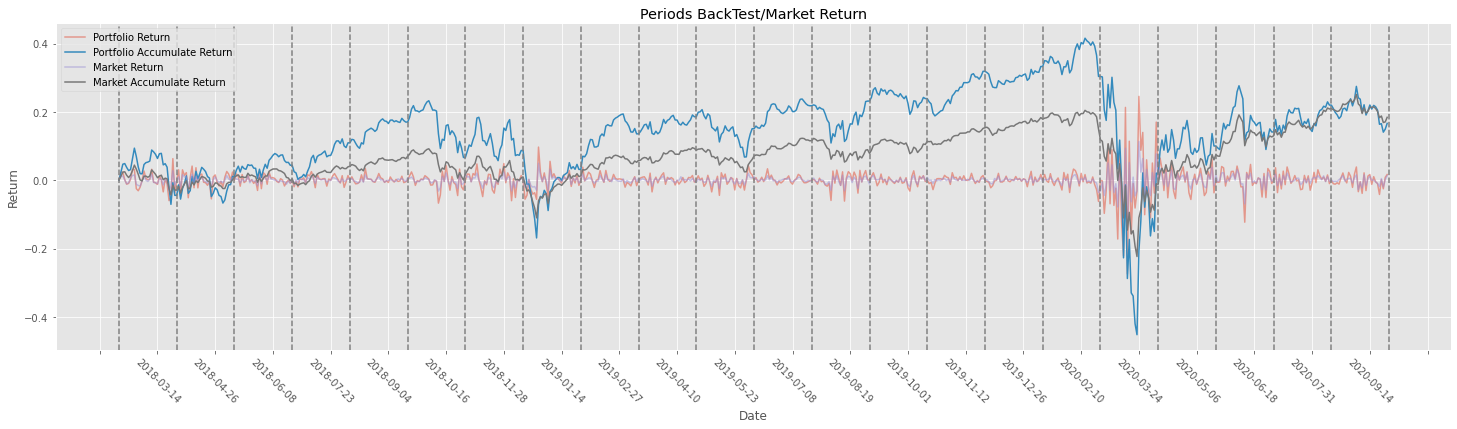

In [214]:
fig,ax = plt.subplots(figsize=(25,6))
ax.set_title('Periods BackTest/Market Return')

#  Portfolio Strategy Return
ax.plot(Back_Testing_Portfolio.index , Back_Testing_Portfolio['Portfolio Returns'],label = 'Portfolio Return' , alpha=0.5 )
ax.plot(Back_Testing_Portfolio.index , Back_Testing_Portfolio['Portfolio Returns'].cumsum(),label = 'Portfolio Accumulate Return')

#  Market Return
ax.plot(Back_Testing_Portfolio.index , Back_Testing_Portfolio['^DJI'],label = 'Market Return' , alpha=0.5 )
ax.plot(Back_Testing_Portfolio.index , Back_Testing_Portfolio['^DJI'].cumsum() ,label = 'Market Accumulate Return')

# Reblance Date : 
for i in range(Strategy_Signal.shape[0]):
    plt.axvline(Strategy_Signal['Date'][i],linestyle='--',color='gray')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.xticks(rotation=-45)
plt.ylabel('Return')
plt.xlabel('Date')
plt.legend()

# T-Statistic

In [211]:
import statsmodels.api as sm 

def OLS_Linear_Regression(y,x,Print=None):

    # linear Regression
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    res   = model.fit()

    # Print Summary
    if Print :
        print(res.summary())
    
    return res


OLS_Linear_Regression(Back_Testing_Portfolio['Portfolio Returns'] ,Back_Testing_Portfolio['^DJI'], Print=True)

                            OLS Regression Results                            
Dep. Variable:      Portfolio Returns   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:30:15   Log-Likelihood:                 2258.3
No. Observations:                 660   AIC:                            -4513.
Df Residuals:                     658   BIC:                            -4504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.009      0.3